In [1]:
import torch 
import torchaudio 

In [2]:
# raw audio waveforms <-> spectrogram convertion 

from utils import * 

In [3]:
# Initialize parameters 
N_FFT = 2048 
HOP_LENGTH = 512 
POWER = 2.0 
T = 512 

#This function converts raw audio waveforms e.g. mp3 into mel spectrograms as they provide better training results according to the AudioLDM paper. 
def wav_to_spec(wav): 
    waveform, sample_rate = librosa.load(wav) 
    
    target_length = T * HOP_LENGTH - 1 # Calculate the waveform length 
    
    # Pad or cut the audio if it is shorter than the target length 
    if len(waveform) < target_length:   
        waveform = np.pad(waveform, (0, target_length - len(waveform)), mode='constant') 
    else: 
        waveform = waveform[:target_length] 
    
    # Use librosa to convert mp3 to mel spectrogram 
    mel = melspectrogram( 
        y = waveform, 
        sr = sample_rate, 
        n_fft = N_FFT, 
        hop_length = HOP_LENGTH, 
        power = POWER, 
        n_mels = 80, 
    ) 
    
    return mel, sample_rate 

# This function visualises the mel spectrogram 
def show_spec(mel): 
    plt.figure(figsize=(10, 4)) 
    plt.imshow(mel, aspect='auto', origin='lower', cmap='magma') 
    plt.title("Mel Spectrogram") 
    plt.xlabel("Time (frames)") 
    plt.ylabel("Mel Bands") 
    plt.tight_layout() 
    plt.show() 
    
# This function reverts a mel spectrogram into a hearable audio 
def spec_to_wav(spec, sample_rate): 
    spec = spec 
    inv = inverse.mel_to_audio( 
        spec, 
        sr = sample_rate, 
        n_fft = N_FFT, 
        hop_length = HOP_LENGTH, 
        power = POWER, 
        n_iter = 64 
    ) 
    
    sd.play(inv, sample_rate) 

(80, 512)


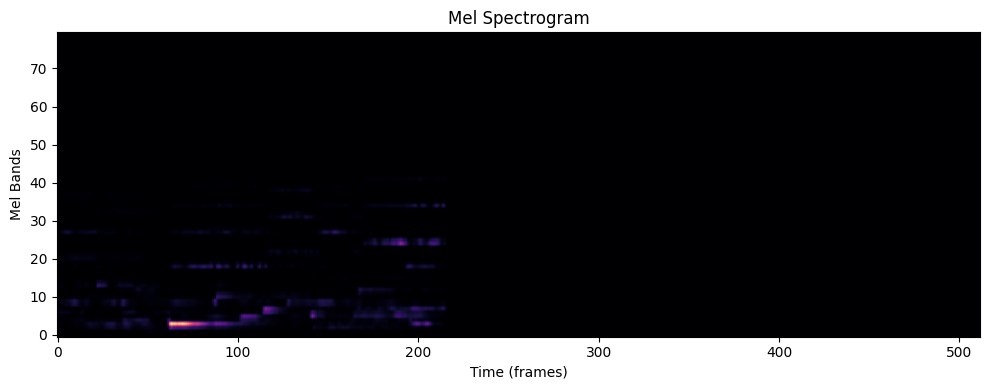

In [4]:
# Test if the functions work as intended 
import random 
randn = random.randint(1000, 7000) 
mel, sr = wav_to_spec(f"../data_parsed_five_sec/Medieval_Celtic_Music_{randn}.wav") 
print(mel.shape) 
show_spec(mel) 

In [5]:
spec_to_wav(mel, sr) 